In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df1 = pd.read_csv("AgeDataset-V1.csv")

In [3]:
df1.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [4]:
df1.shape

(1223009, 10)

In [5]:
df1.isnull().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [7]:
df1.drop(['Id','Short description','Name'], 1,inplace=True)


In [8]:
# calculate percentage of missing values in each column
missing_value_df = pd.DataFrame({
    'column_name': df1.columns,
    'percent_missing': df1.isnull().mean() * 100

})
missing_value_df

,column_name,percent_missing
Gender,Gender,10.927638
Country,Country,27.433077
Occupation,Occupation,16.918436
Birth year,Birth year,0.000000
Death year,Death year,0.000082
Manner of death,Manner of death,95.617121
Age of death,Age of death,0.000082


In [9]:
df1.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [10]:
print("shape of the dataset after deleting 'Id' column",df1.shape)

shape of the dataset after deleting 'Id' column (1223009, 7)


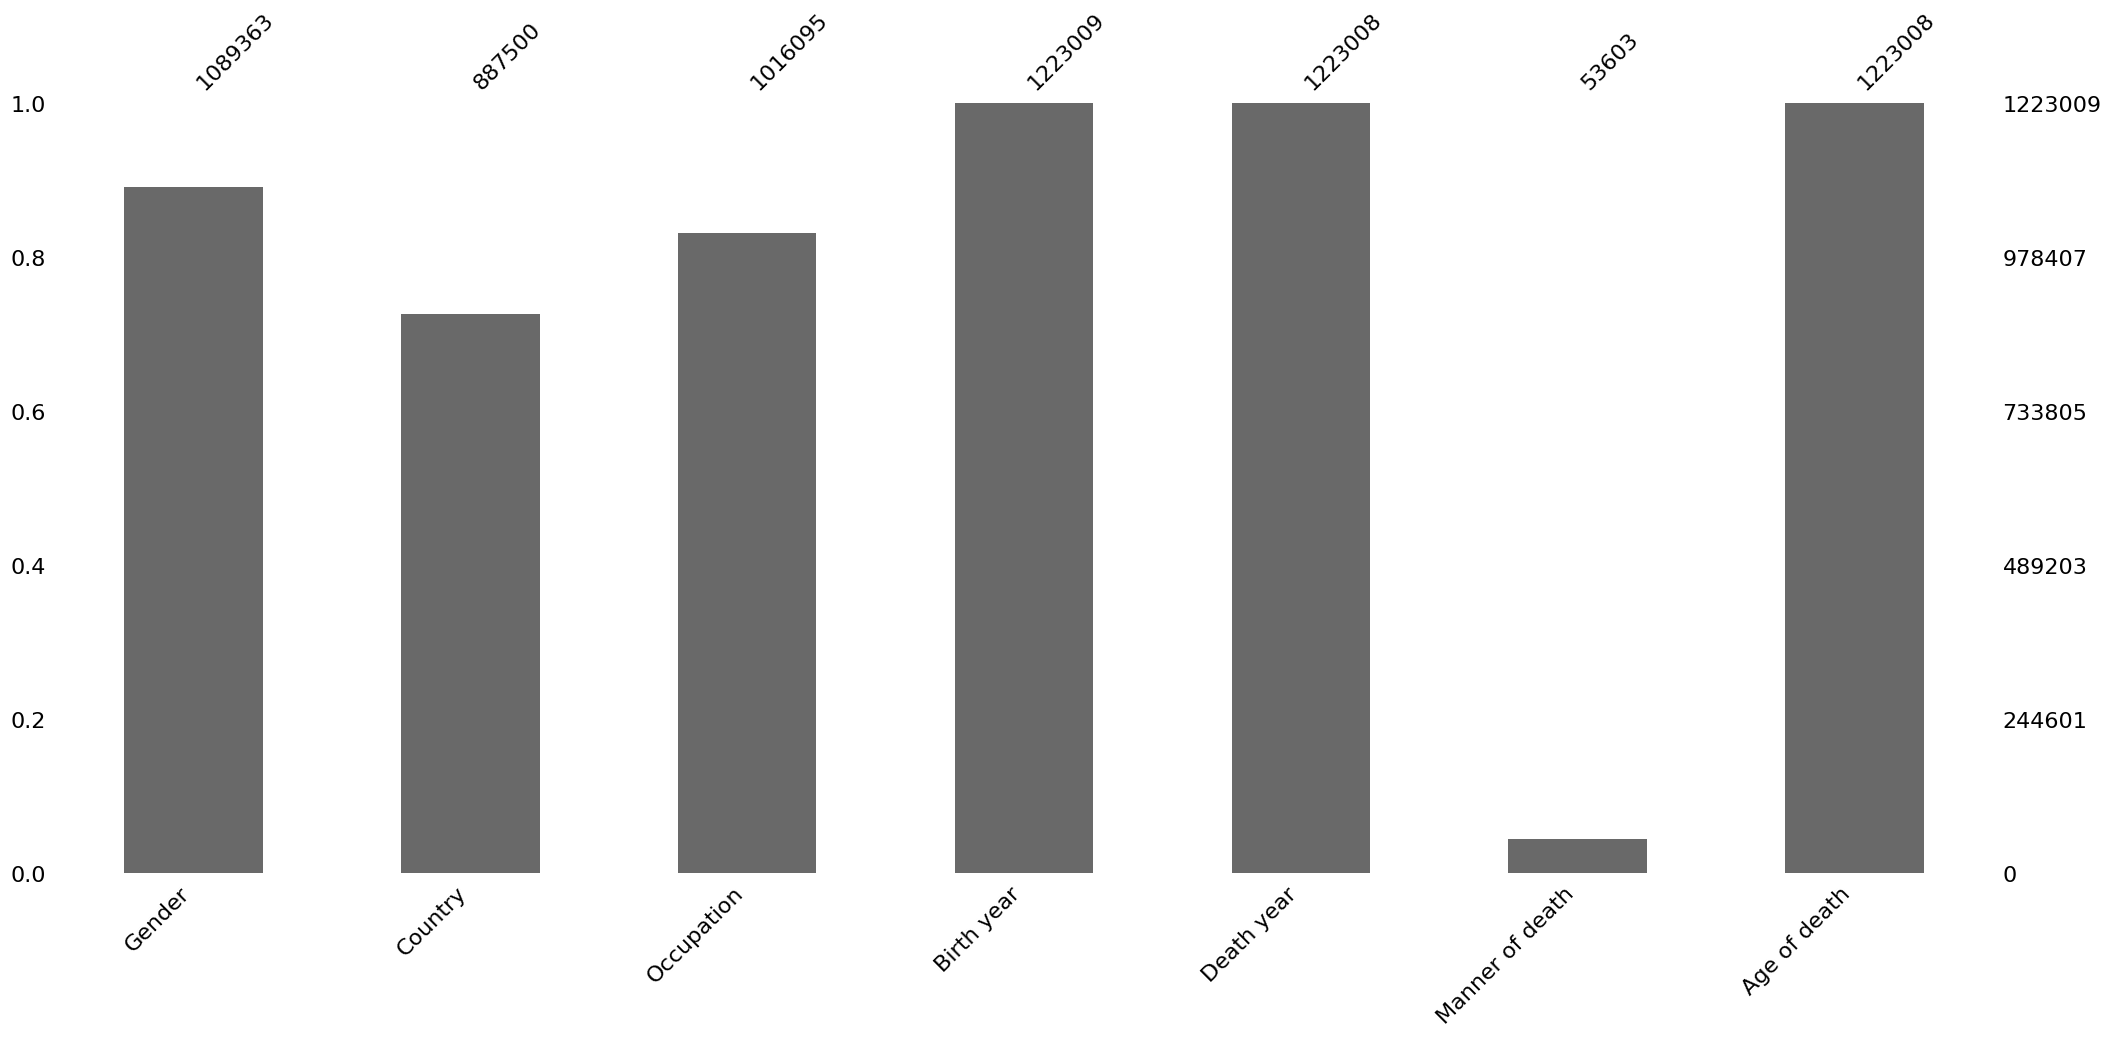

In [11]:
import missingno as msno
msno.bar(df1)
plt.show()



<AxesSubplot: >

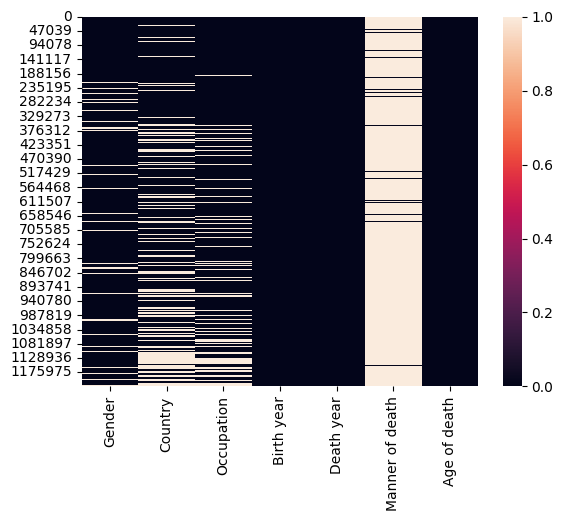

In [12]:
sns.heatmap(df1.isnull(), cbar="Reds")

In [13]:
df1['Gender'].unique()

array(['Male', 'Female', nan, 'Transgender Female', 'Intersex',
       'Transgender Person; Intersex; Transgender Male', 'Non-Binary',
       'Eunuch; Male', 'Transgender Male', 'Eunuch', 'Intersex; Male',
       'Transgender Female; Female', 'Transgender Female; Male',
       'Female; Male', 'Intersex; Transgender Male',
       'Transgender Male; Female', 'Transgender Male; Male',
       'Intersex; Female', 'Transgender Female; Intersex',
       'Female; Female', 'Non-Binary; Intersex'], dtype=object)

In [14]:
df1['Gender'] = df1['Gender'].replace({
    'Transgender Person; Intersex; Transgender Male': 'Transgender Male',
    'Transgender Male; Male': 'Transgender Male',
    'Female; Female': 'Female',
    'Transgender Female; Female': 'Transgender Female'
})

In [15]:
df1.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [16]:
df1['Death year'] = df1['Death year'].astype('Int64')


In [17]:
gender = df1['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'Count']
gender

,Gender,Count
0,Male,981365
1,Female,107831
2,Transgender Female,80
3,Transgender Male,38
4,Eunuch; Male,18
5,Intersex,7
6,Female; Male,7
7,Eunuch,3
8,Transgender Male; Female,3
9,Non-Binary,2


In [18]:
colors = ['#FF0000', '#FF2800', '#FF5000', '#FF7800', '#FFA000', '#FFC800', '#FFFF00', '#C8FF00', '#A0FF00', '#78FF00', '#50FF00', '#28FF00', '#00FF00']


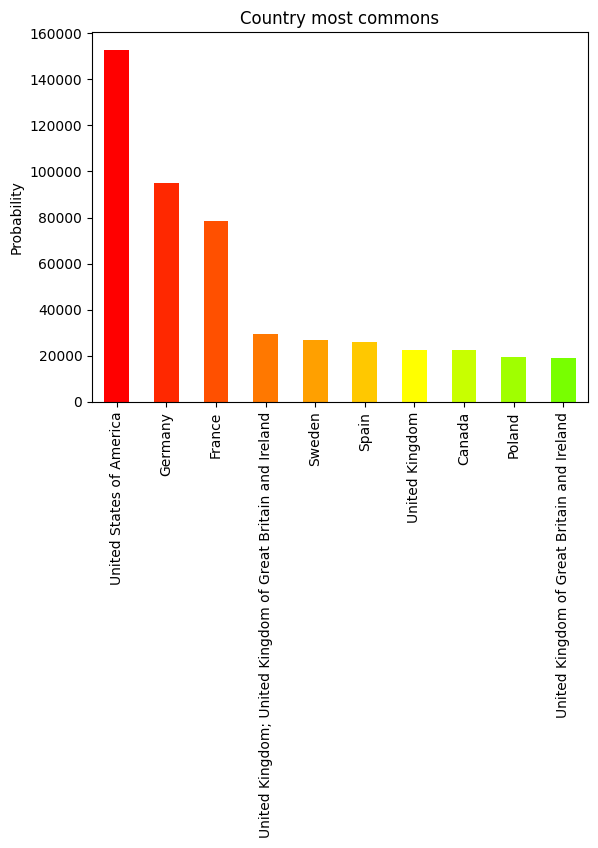

In [19]:
#%matplotlib inline
country_df = df1['Country'].value_counts().reset_index()
country_df.columns = ['Country', 'Count']
df1["Country"].value_counts()[:10].plot(kind='bar', color = colors)
plt.title('Country most commons')
plt.ylabel("Probability")
plt.xticks(rotation=90)
plt.show()

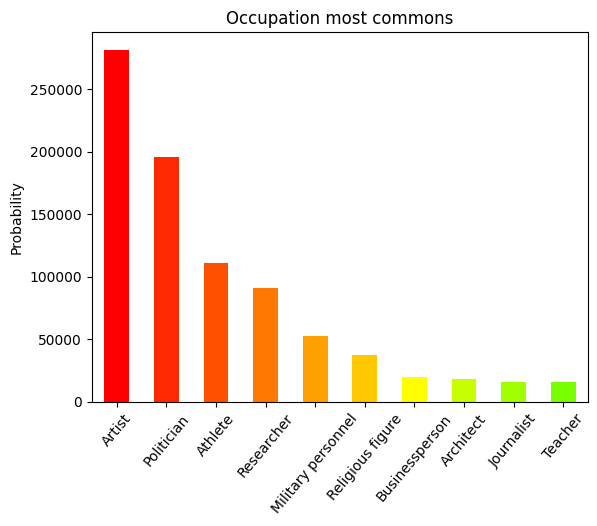

In [20]:
Occupation_df = df1['Occupation'].value_counts().reset_index()
Occupation_df.columns = ['Occupation', 'Count']
df1["Occupation"].value_counts()[:10].plot(kind='bar', color = colors)
plt.title('Occupation most commons')
plt.ylabel("Probability")
plt.xticks(rotation=50)
plt.show()

<AxesSubplot: >

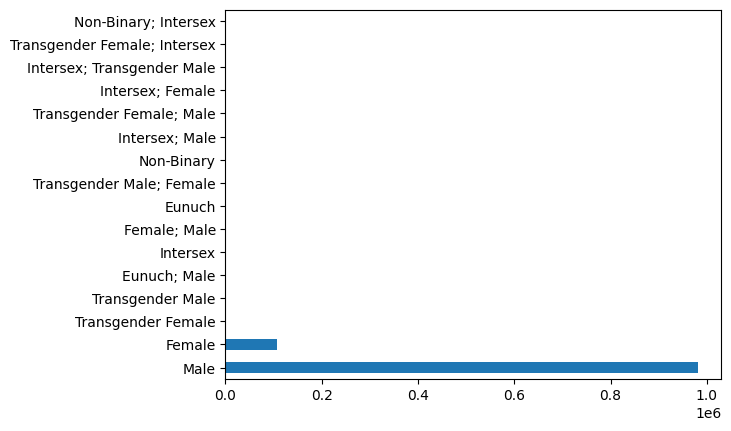

In [21]:
df1['Gender'].value_counts()[:20].plot(kind='barh')

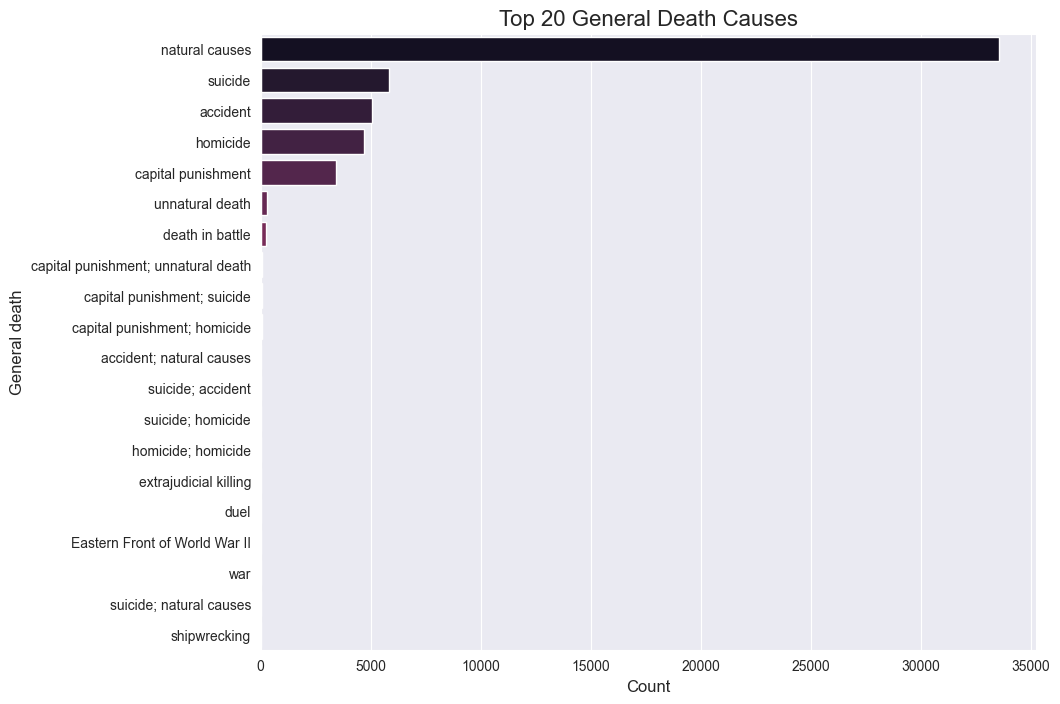

In [22]:
top_20 = df1['Manner of death'].value_counts()[:20]

# Set the style
sns.set_style('darkgrid')

# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_20, y=top_20.index, palette='rocket')

# Set the axis labels and title
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('General death', fontsize=12)
ax.set_title('Top 20 General Death Causes', fontsize=16)

# Display the plot
plt.show()



In [23]:
birth_year = df1.groupby('Birth year').size().reset_index(name='count') \
                .sort_values(by='count', ascending=False) \
                .iloc[:20]
print(birth_year)

      Birth year  count
2078        1920  13468
2079        1921  13373
2080        1922  12856
2082        1924  12856
2081        1923  12691
2083        1925  12495
2084        1926  11899
2085        1927  11699
2086        1928  11604
2072        1914  11591
2070        1912  11403
2071        1913  11364
2068        1910  11221
2087        1929  11125
2088        1930  11073
2077        1919  10997
2069        1911  10882
2067        1909  10870
2066        1908  10862
2065        1907  10715


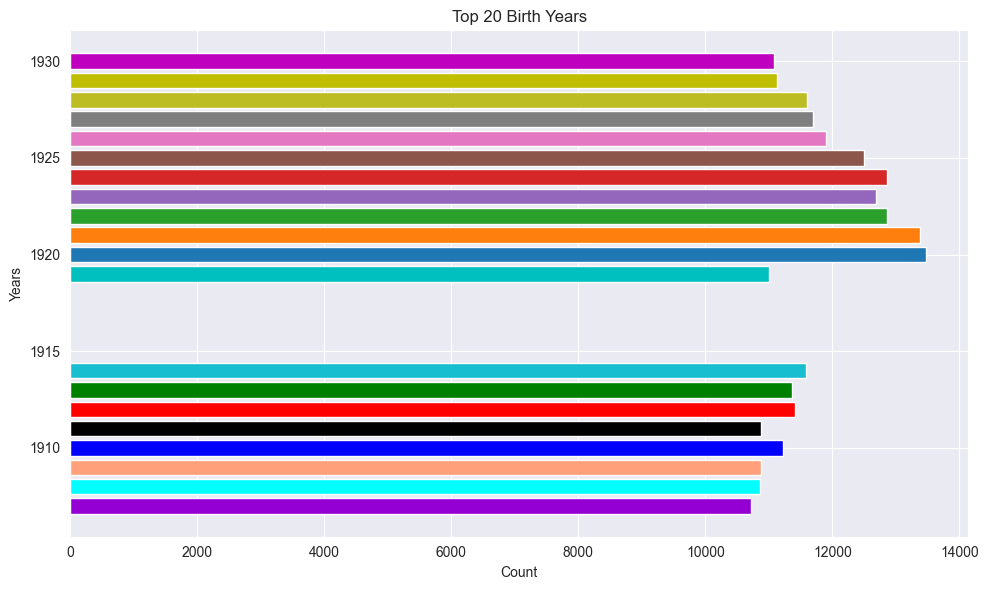

In [24]:
fig = plt.figure(figsize = (10,6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'r', 'g', 'b', 'y', 'm', 'c', 'k', '#FFA07A', '#00FFFF', '#9400D3']
plt.barh(birth_year['Birth year'], birth_year['count'], color=colors)
plt.title('Top 20 Birth Years')
plt.xlabel('Count')
plt.ylabel('Years')
plt.tight_layout()
plt.style.use('fivethirtyeight')

In [25]:
death_year = df1.groupby('Death year').size().reset_index(name='count') \
                .sort_values(by='count', ascending=False) \
                .iloc[:20]
print(death_year)

      Death year  count
2246        2015  13952
2245        2014  13915
2244        2013  13582
2247        2016  13538
2248        2017  13425
2243        2012  13128
2249        2018  13114
2242        2011  13057
2241        2010  13034
2240        2009  12639
2239        2008  12545
2250        2019  12090
2238        2007  12059
2237        2006  11702
2251        2020  11340
2236        2005  11031
2175        1944  10882
2231        2000  10863
2235        2004  10629
2176        1945  10471


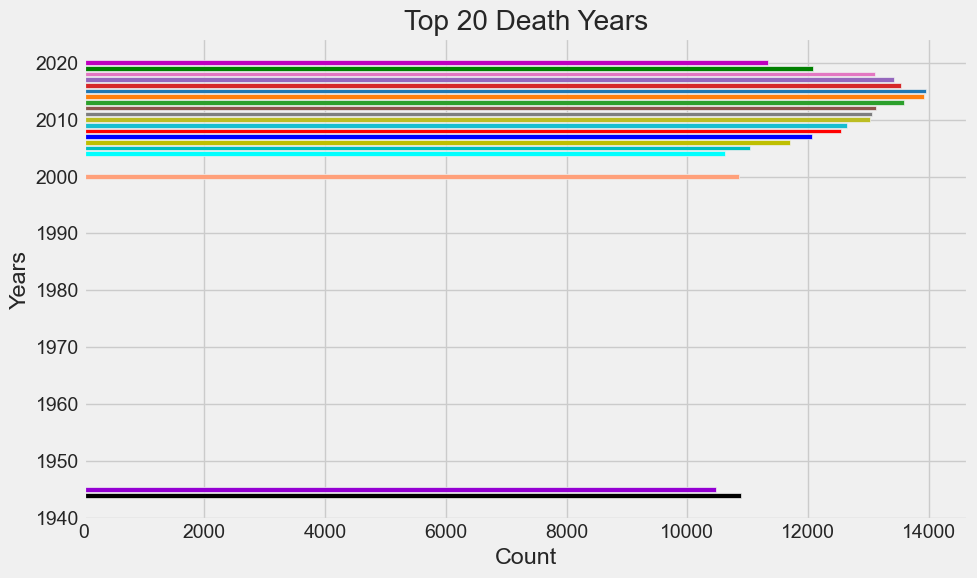

In [26]:
fig = plt.figure(figsize = (10,6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'r', 'g', 'b', 'y', 'm', 'c', 'k', '#FFA07A', '#00FFFF', '#9400D3']
plt.barh(death_year['Death year'], death_year['count'], color=colors)
plt.title('Top 20 Death Years')
plt.xlabel('Count')
plt.ylabel('Years')
plt.tight_layout()
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Top 10 Genders')

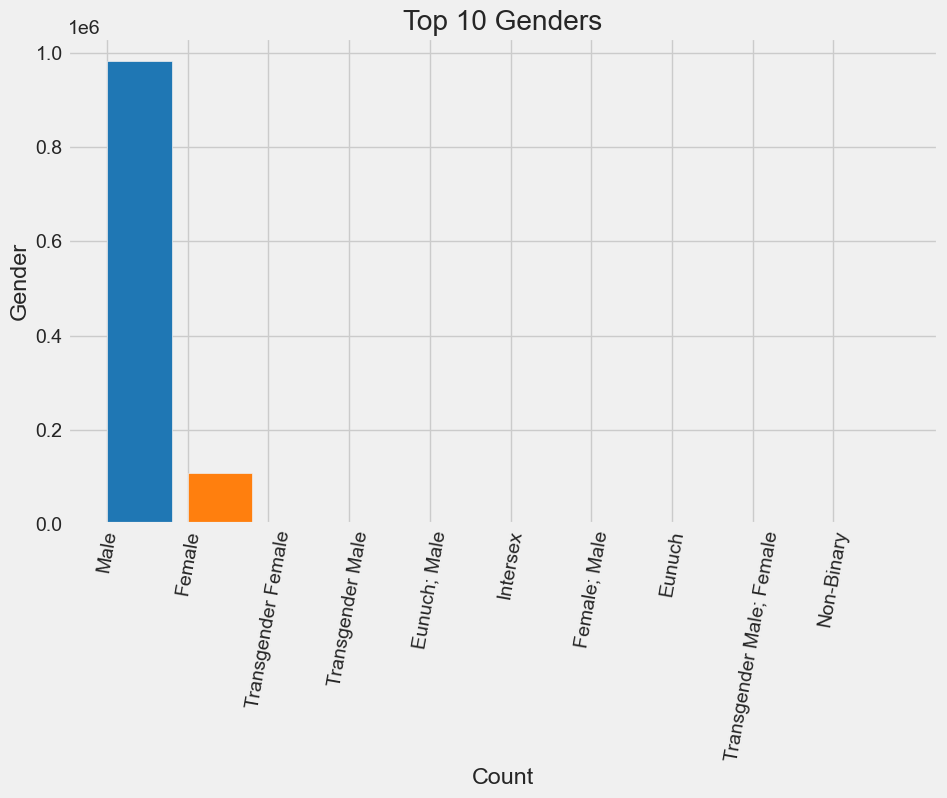

In [27]:
gender_counts = df1['Gender'].value_counts().head(10)

# create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(gender_counts.index, gender_counts.values, align='edge', color=colors)

# set labels and title
ax.set_xlabel('Count')
plt.xticks(rotation=80)
ax.set_ylabel('Gender')
ax.set_title('Top 10 Genders')

In [28]:
Avg_age_of_death = df1.groupby('Occupation')['Age of death'].mean().sort_values(ascending = True).head(n=40)
print(Avg_age_of_death)


Occupation
Miner; master builder                    11.00
Pioneers-heroes                          11.00
Servant of god                           12.00
Basij                                    13.00
Lehnsmann                                13.00
Pupil; blogger                           14.00
Merchant; weaver                         14.00
Warlord; criminal                        14.00
Novelist; youtuber                       14.00
Altar server                             15.00
Internet; author; vlog                   16.00
Dramaturge; choreographer; librettist    16.00
Student; cadet                           16.00
Pupil                                    16.25
Comedian; owarai tarento                 17.00
Handyman                                 17.00
High school student                      17.50
Muse                                     17.50
Criminal; terrorist                      18.00
Midshipman                               18.00
Student; motivational speaker            18.00
Wi

In [29]:
avg_dth= df1.groupby('Occupation')['Age of death'].mean().sort_values(ascending = False).head( n= 40)
print(avg_dth)


Occupation
Farmer; lecturer                                                   121.0
Nurse; weaver; sailor                                               99.0
Activist; trade unionist; peace activist                            99.0
Civil servant; marine biologist; malacologist                       99.0
Classical scholar; college head; academic administrator             99.0
Non-commissioned officer; partisan                                  99.0
Suffragette; philanthropist; social reformer; suffragist            99.0
Cabinetmaker; master craftsman; chair-maker; furniture designer     99.0
Psychiatrist; sociologist                                           99.0
Psychologist; clinical psychologist                                 99.0
Nurse; spy; french resistance fighter                               99.0
Tarento; critic                                                     99.0
Vicar; vicar general; curate                                        99.0
Cinematographer; director               

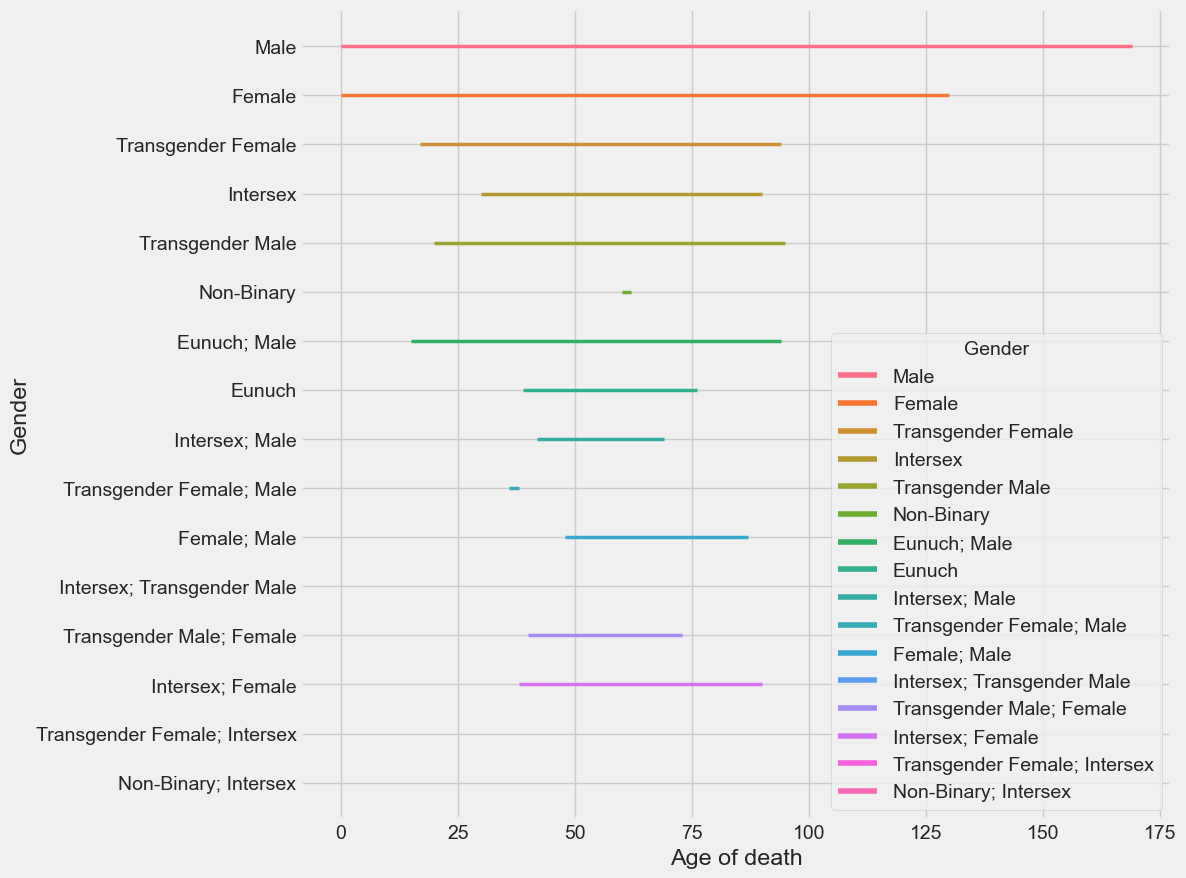

In [30]:
grp = df1.groupby('Gender')['Age of death'].mean().round(0)
fig = plt.figure(figsize =(10,10))
sns.lineplot(x = df1['Age of death'],y = df1['Gender'], hue = df1['Gender'], linewidth=2.5)

plt.show()

In [31]:
df1.isnull().sum()

Gender              133646
Country             335509
Occupation          206914
Birth year               0
Death year               1
Manner of death    1169406
Age of death             1
dtype: int64

In [32]:
df1["Death year"]

0          1799
1          2001
2          1865
3          1791
4          1827
           ... 
1223004    1996
1223005    2004
1223006    1944
1223007    1915
1223008    2017
Name: Death year, Length: 1223009, dtype: Int64

In [33]:
#dropping one record having both columns null
df2=df1.copy()
df2.dropna(subset=["Death year","Age of death"],inplace=True)

In [34]:
df2.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0
1,Male,United Kingdom,Artist,1952,2001,natural causes,49.0
2,Male,United States of America,Politician,1809,1865,homicide,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,NaN,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,NaN,57.0


In [35]:
df2["Age of death"] = df2['Age of death'].astype(int)
df2.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67
1,Male,United Kingdom,Artist,1952,2001,natural causes,49
2,Male,United States of America,Politician,1809,1865,homicide,56
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,NaN,35
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,NaN,57


In [36]:
df2=df1.copy()
df2.dropna(inplace=True,subset=["Age of death"])

In [37]:
def detect_outliers_iqr(data, cofactor=1.5):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - cofactor * iqr
    upper_bound = q3 + cofactor * iqr
    return [i for i in data if (i < lower_bound or i > upper_bound)]

outliers_age_mild = detect_outliers_iqr(df2['Age of death'])
outliers_age_extreme = detect_outliers_iqr(df2['Age of death'], cofactor=3)


In [38]:
print("Percentage of mild outliers: {:.2f}%".format(len(outliers_age_mild)*100/df1.shape[0]))
print("Percentage of extreme outliers: {:.2f}%".format(len(outliers_age_extreme)*100/df1.shape[0]))

Percentage of mild outliers: 2.40%
Percentage of extreme outliers: 0.00%


<AxesSubplot: >

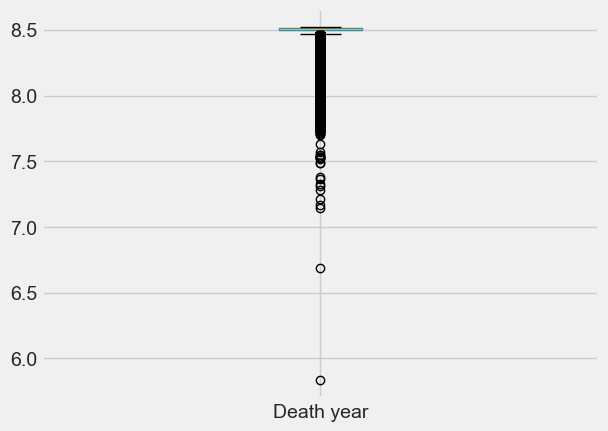

In [39]:
df2 = df1.copy()
df2.dropna(subset=["Death year"], inplace=True)

df2["Death year"] = np.log(df2["Death year"] + 3000)

df2.boxplot(column="Death year")

In [40]:
df2 = df1.dropna(subset=["Death year"]).copy()

def detect_outliers_iqr(data, cofactor=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - cofactor * iqr
    upper_bound = q3 + cofactor * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

outliers_age_mild = detect_outliers_iqr(df2["Death year"])
outliers_age_extreme = detect_outliers_iqr(df2["Death year"], cofactor=3)

In [41]:
print(f"{np.round(len(outliers_age_mild)*100/df1.shape[0],4)} % percentage mild outliers")
print(f"{np.round(len(outliers_age_extreme)*100/df1.shape[0],4)} % percentage extreme outliers")

8.1659 % percentage mild outliers
3.1777 % percentage extreme outliers


In [42]:
categorical_nan=[feature for feature in df2.columns if df2[feature].dtypes=="O" and df2[feature].isnull().sum()>=1]
df2[categorical_nan]=df2[categorical_nan].fillna("Missing")

In [43]:
df2.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0
1,Male,United Kingdom,Artist,1952,2001,natural causes,49.0
2,Male,United States of America,Politician,1809,1865,homicide,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,Missing,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,Missing,57.0


In [44]:
df2.isnull().sum()

Gender             0
Country            0
Occupation         0
Birth year         0
Death year         0
Manner of death    0
Age of death       0
dtype: int64

In [46]:
encoder = preprocessing.LabelEncoder()
df2['Gender'] = encoder.fit_transform(df2['Gender'])
df2['Country'] = encoder.fit_transform(df2['Country'])
df2['Occupation'] = encoder.fit_transform(df2['Occupation'])
df2['Manner of death'] = encoder.fit_transform(df2['Manner of death'])

In [47]:
corr=df2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
Gender,1.00,-0.04,0.09,-0.02,-0.03,-0.06,-0.04
Country,-0.04,1.00,-0.06,0.05,0.05,0.08,0.01
Occupation,0.09,-0.06,1.00,-0.13,-0.12,-0.06,0.01
Birth year,-0.02,0.05,-0.13,1.00,0.99,0.06,0.17
Death year,-0.03,0.05,-0.12,0.99,1.00,0.04,0.28
Manner of death,-0.06,0.08,-0.06,0.06,0.04,1.00,-0.11
Age of death,-0.04,0.01,0.01,0.17,0.28,-0.11,1.00


In [48]:
df2.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,8,5543,6828,1732,1799,138,67.0
1,8,5177,538,1952,2001,138,49.0
2,8,5356,6828,1809,1865,96,56.0
3,8,54,538,1756,1791,16,35.0
4,8,2169,538,1770,1827,16,57.0


In [49]:
X = df2.iloc[:, 1:].values 
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df2.columns[1:]).drop("Age of death",axis=1)
y = df2['Age of death']

In [50]:
y.head()
X.head()

,Country,Occupation,Birth year,Death year,Manner of death
0,1.545992,0.961046,-0.763636,-0.759746,5.063742
1,1.305024,-1.226979,0.723463,0.571920,5.063742
2,1.422875,0.961046,-0.243152,-0.324647,3.252268
3,-2.067866,-1.226979,-0.601407,-0.812485,-0.198159
4,-0.675388,-1.226979,-0.506774,-0.575159,-0.198159


In [51]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (856105, 5)
X_test  (366903, 5)
y_train  (856105,)
y_test  (366903,)


In [79]:
from sklearn.linear_model import LinearRegression #CFS
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)

LinearRegression()

In [81]:
# predict the values
y_pred_OLS = OLS_model.predict(X_test)

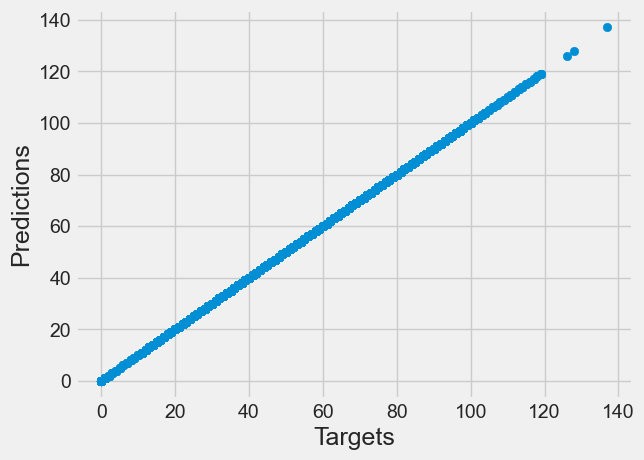

In [82]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

In [86]:
from sklearn.metrics import r2_score

y_pred = OLS_model.predict(X)
score = r2_score(y, y_pred)

print("R-squared score:", score)

R-squared score: 1.0


In [53]:
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(n_neighbors=4)
cv= cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.96666409 0.96726344 0.96746544 0.96710985 0.96728891]
0.967158347106545


In [ ]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [96]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
# Try out all the options to split at each and every node and build a tree/model
decision_tree_model = decision_tree.fit(X_train, y_train)

In [97]:
y_pred = decision_tree.predict(X_test)

In [98]:
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [99]:
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

         0.0       0.68      0.52      0.59        85
         1.0       0.30      0.35      0.32        40
         2.0       0.15      0.15      0.15        26
         3.0       0.30      0.30      0.30        20
         4.0       0.11      0.10      0.11        20
         5.0       0.14      0.17      0.15        18
         6.0       0.14      0.27      0.18        15
         7.0       0.29      0.10      0.15        20
         8.0       0.12      0.09      0.10        23
         9.0       0.33      0.14      0.19        22
        10.0       0.21      0.15      0.18        20
        11.0       0.43      0.44      0.44        72
        12.0       0.49      0.40      0.44        87
        13.0       0.43      0.55      0.48        75
        14.0       0.46      0.40      0.42        96
        15.0       0.42      0.44      0.43       122
        16.0       0.36      0.36      0.36       129
        17.0       0.42    

In [72]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
# fit = training = creating 100 random DT's
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [73]:
y_pred = rf_reg.predict(X_test)

In [74]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.0420274841034279
Mean Squared Error (MSE): 0.2818017413321777
Root Mean Squared Error (RMSE): 0.5308500177377578


In [87]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
dt1 = DecisionTreeRegressor(max_depth=4)
dt2 = DecisionTreeRegressor(max_depth=8)

# Train the models on the training set
lr.fit(X_train, y_train)
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)

# Create the voting regressor
ensemble = VotingRegressor(estimators=[('lr', lr), ('dt1', dt1), ('dt2', dt2)])

# Fit the voting regressor on the training set
ensemble.fit(X_train, y_train)

# Evaluate the performance on the testing set
y_pred = ensemble.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)

Mean squared error: 31.083311483966373


In [94]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('Knn', KNeighborsRegressor()))

# Evaluate each model using cross-validation
results = []
names = []
for name, model in models:
    cv_results = -1 * cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean RMSE: {np.mean(cv_results)}, Standard Deviation: {np.std(cv_results)}")

# Compare the results in a table
results_df = pd.DataFrame({'Model': names, 'Mean RMSE': [np.mean(result) for result in results], 'Standard Deviation': [np.std(result) for result in results]})
print(results_df)

LR: Mean RMSE: 1.5847246416515146e-23, Standard Deviation: 1.1529947435620982e-23
DT: Mean RMSE: 0.712217432458552, Standard Deviation: 0.14095220893050886
Knn: Mean RMSE: 8.77822445078481, Standard Deviation: 0.12343432458607612
  Model     Mean RMSE  Standard Deviation
0    LR  1.584725e-23        1.152995e-23
1    DT  7.122174e-01        1.409522e-01
2   Knn  8.778224e+00        1.234343e-01
